In [22]:
import rtde_control
import rtde_receive
import numpy as np
import spatialmath as sm

In [32]:
import poses
%matplotlib inline
import matplotlib.pyplot as plt

In [17]:
# robotIP = "192.168.0.6"
# rtde_control = rtde_control.RTDEControlInterface(robotIP)
# rtde_receive = rtde_receive.RTDEReceiveInterface(robotIP)

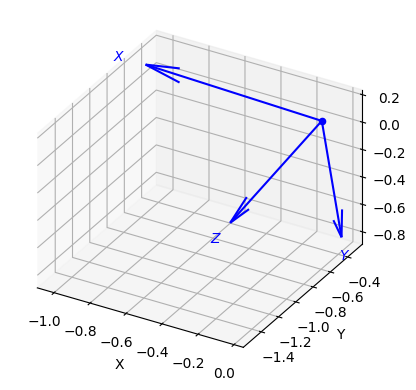

In [36]:
class UR5_Interface():
    def __init__(self):
        self.robotIP = "192.168.0.6"
    
    def getJointAngles(self):
        # Returns a 6 element numpy array of joint angles (radians)
        thetas = np.array(self.r.getActualQ())
        return thetas
    
    def getPose(self):
        # Returns the current pose of the gripper as a SE3 Object (4 x 4 Homegenous Transform)
        p = self.r.getActualTCPPose() 
        poseMatrix = self.poseVectorToMatrix(p)
        T_N = sm.SE3(poseMatrix)
        T_N.plot(name="C")
        return T_N

    
    def poseVectorToMatrix(self,poseVector):
        # Converts poseVector into an SE3 Object (4 x 4 Homegenous Transform)
        # poseVector is a 6 element list of [x, y, z, rX, rY, rZ]
        T_N = sm.SE3(poses.pose_vec_to_mtrx(poseVector))
        return T_N
    
    def poseMatrixToVector(self,poseMatrix):
        # Converts poseMatrix into a 6 element list of [x, y, z, rX, rY, rZ] 
        # poseMatrix is a SE3 Object (4 x 4 Homegenous Transform) or numpy array
        return poses.pose_mtrx_to_vec(np.array(poseMatrix))
        
    
    def moveJ(self,qGoal):
        # qGoal is a 6 element numpy array of joint angles (radians)
        # speed is joint velocity (rad/s)
        qGoal = list(qGoal)
        print(f"MoveJ to:\n {np.degrees(qGoal).reshape((6,1))}")
        self.c.moveJ(qGoal,1.05,1.4,True)
    
    def moveHome(self):
        # Moves the arm linearly in cartesian space to home pose
        homePose = np.array([[ 0.99955322, -0.02418213, -0.01756664,  0.01498893],
                             [-0.01748495,0.00358545,-0.9998407,-0.57686779],
                             [0.02424126,0.99970114,0.00316103,0.05545535],
                             [0,0,0,1]])
        self.arm.move(target=homePose,move_type="l")
    
    def openGripper(self):
        self.gripper.release()
    
    def closeGripper(self):
        self.gripper.close
        
    def routine(self):
        self.moveHome()
        initPose = self.arm.get_tcp_pose()
        print(f"initPose: \n {initPose}")
        # translate forward to block
        dX,dY,dZ = 0,0,0.05
        goalPose = poses.translate_pose(initPose,translation_vec=[dX,dY,dZ],dir_pose="origin")
        print(f"goalPose:\n{goalPose}")
        self.arm.move(target=goalPose,move_type="l")
        print(f"finalPose: \n{arm.get_tcp_pose()}")

try:
    ur = UR5_Interface()
    ur.c = rtde_control.RTDEControlInterface(robotIP)
    ur.r = rtde_receive.RTDEReceiveInterface(robotIP)
    ur.getPose()
    
    # q = ur.getJointAngles()
    # print(np.degrees(q).reshape((6,1)))
    # q[-1] -= np.radians(25)
    # ur.moveJ(q)
    
    
except Exception as e:
    raise(e)
finally:
    ur.c.disconnect()
    ur.r.disconnect()
    pass
    # urInterface.rtde_control.stopScript()
    # urInterface.rtde_receive.stopScript()